# Approach

### Step 1: Understand the Data
### Step 2: Cleaning and Analysis of data
### Step 3: Splitting the Dataset into test and train and build the model Using RFE
### Step 4: Manual Elimination (If Needed) Depends upon F-statics, R squared etc...
### Step 5: Model Evaluation

# Data understanding, preparation and EDA

In [91]:
# Importing Required Libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

In [92]:
# Read the File and store it Pandas Dataframe
BikeSharing_DF = pd.read_csv("day.csv")
#Printing Head just to ensure correct file is loaded
BikeSharing_DF.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        1           1   
1        2  02-01-2018       1   0     1        0        2           1   
2        3  03-01-2018       1   0     1        0        3           1   
3        4  04-01-2018       1   0     1        0        4           1   
4        5  05-01-2018       1   0     1        0        5           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [93]:
# check rows and coloumns
BikeSharing_DF.shape

(730, 16)

In [94]:
#Check For Datatypes and NULL values if Any

BikeSharing_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [95]:
#Checking the Numerical Data

BikeSharing_DF.describe()

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.995890   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.000339   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.690411    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.462641    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

Observation till Now : There are 730 rows and 16 columns in this dataframe without any NULL values

## Cleaning Data
Dropping unused Columns
Instant: This column is identifier and hence not helpful in future analysis: Data in this columns is already stored in some other columns like month, year, weekday.

In [96]:
#Before dropping date, let us introduce a days_old variable which indicates how old is the business
BikeSharing_DF['Days_Old'] = (pd.to_datetime(BikeSharing_DF['dteday'],format= '%d-%m-%Y') - pd.to_datetime('01-01-2018',format= '%d-%m-%Y')).dt.days

In [97]:
# Droping instant column as it is index column which has nothing to do with target
BikeSharing_DF.drop(['instant'], axis = 1, inplace = True)

# Dropping dteday as we have already have month and weekday columns to work with
BikeSharing_DF.drop(['dteday'], axis = 1, inplace = True)

# Dropping casual and registered columns as we have cnt column which is sum of the both that is the target column

BikeSharing_DF.drop(['casual'], axis = 1, inplace = True)
BikeSharing_DF.drop(['registered'], axis = 1, inplace = True)

In [98]:
# Checking the dataframe again

BikeSharing_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
 12  Days_Old    730 non-null    int64  
dtypes: float64(4), int64(9)
memory usage: 74.3 KB


Handling Missing Values

In [99]:
BikeSharing_DF.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
Days_Old      0
dtype: int64

No missing values, all green for next step!

Checking for Outliers

In [100]:
#Print number of unique values in all columns 
BikeSharing_DF.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
Days_Old      730
dtype: int64

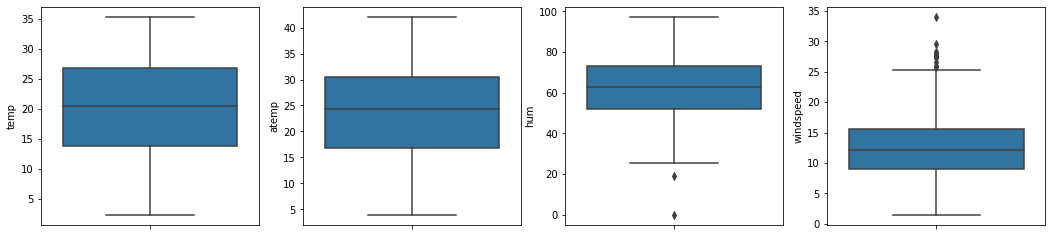

In [101]:
#Draw box plots for independent variables
cols = ['temp', 'atemp', 'hum', 'windspeed']
plt.figure(figsize=(18,4))

i = 1
for col in cols:
    plt.subplot(1,4,i)
    sns.boxplot(y=col, data=BikeSharing_DF)
    i+=1

Data looks consistant, there are no Outliers to be handled

## EDA

### Convert Season and Weathersit to Categorical Types

In [102]:
BikeSharing_DF.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)

BikeSharing_DF.weathersit.replace({1:'good',2:'moderate',3:'bad',4:'severe'},inplace = True)

BikeSharing_DF.mnth = BikeSharing_DF.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})

BikeSharing_DF.weekday = BikeSharing_DF.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})
BikeSharing_DF.head()

season  yr mnth  holiday weekday  workingday weathersit       temp  \
0  spring   0  jan        0     mon           1   moderate  14.110847   
1  spring   0  jan        0     tue           1   moderate  14.902598   
2  spring   0  jan        0     wed           1       good   8.050924   
3  spring   0  jan        0     thu           1       good   8.200000   
4  spring   0  jan        0     fri           1       good   9.305237   

      atemp      hum  windspeed   cnt  Days_Old  
0  18.18125  80.5833  10.749882   985         0  
1  17.68695  69.6087  16.652113   801         1  
2   9.47025  43.7273  16.636703  1349         2  
3  10.60610  59.0435  10.739832  1562         3  
4  11.46350  43.6957  12.522300  1600         4

## Seeing The Graphs

<Figure size 1080x2160 with 0 Axes>

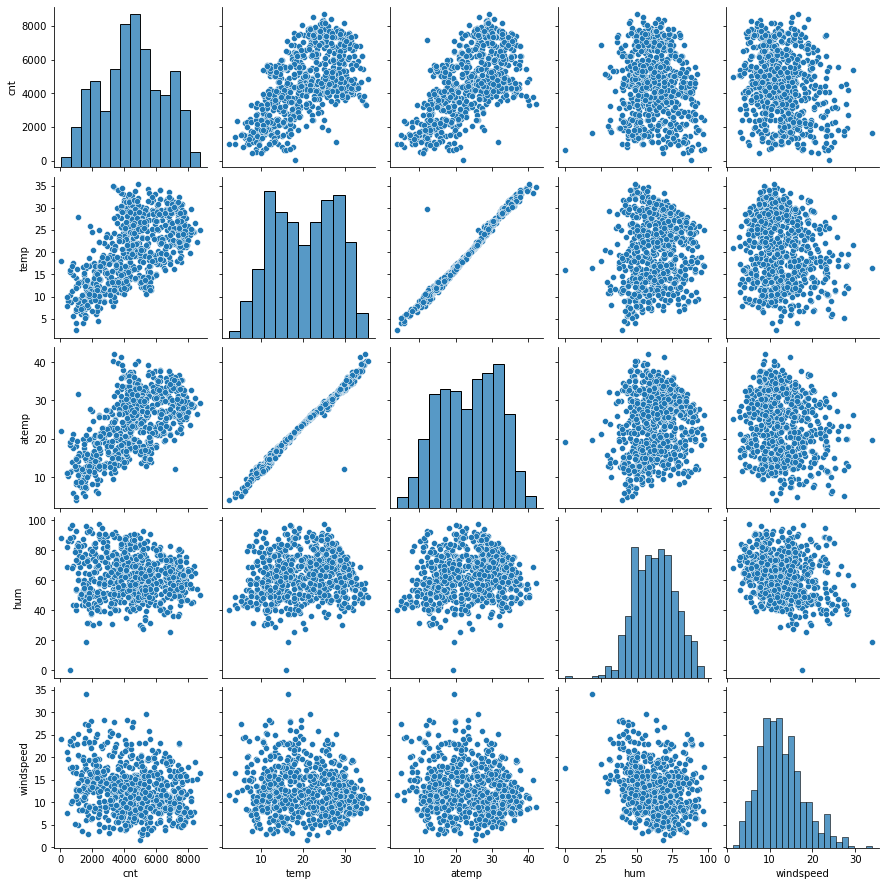

In [103]:
#Draw pairplots for continuous numeric variables using seaborn
plt.figure(figsize = (15,30))
sns.pairplot(data=BikeSharing_DF,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

From the above graph we can see that temp and atemp are highly correalted with target variable cnt

###### Visualising the Data to Find the Correlation between the Numerical Variable

<Figure size 1440x1080 with 0 Axes>

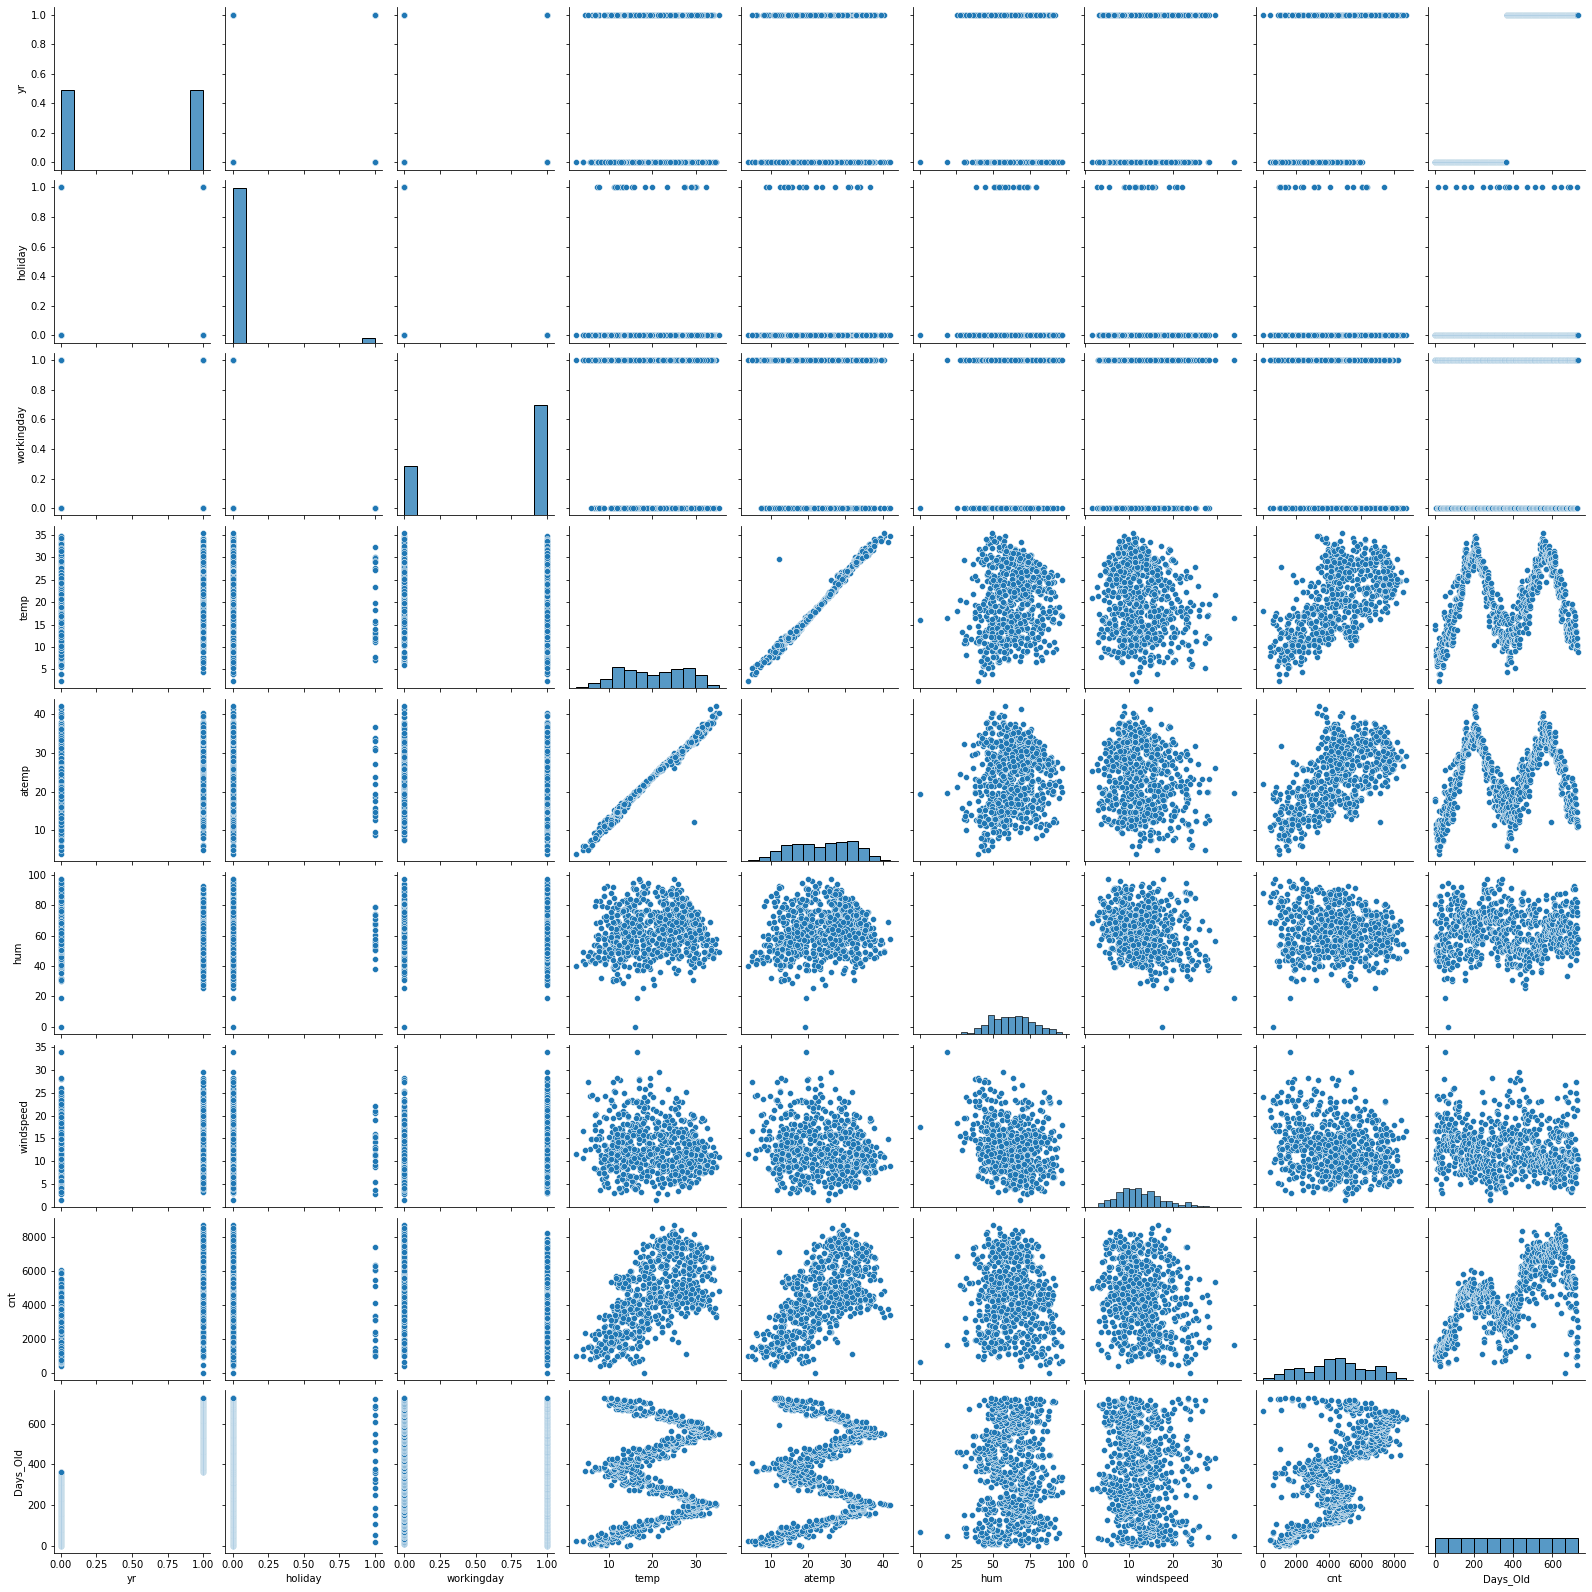

In [104]:
plt.figure(figsize=(20,15))
sns.pairplot(BikeSharing_DF)
plt.show()

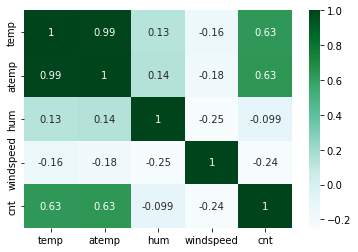

In [105]:
#HMMM Time for a heat map 
# Checking continuous variables relationship with each other
sns.heatmap(BikeSharing_DF[['temp','atemp','hum','windspeed','cnt']].corr(), cmap='BuGn', annot = True)
plt.show()

temp and atemp is having correlation >= .99

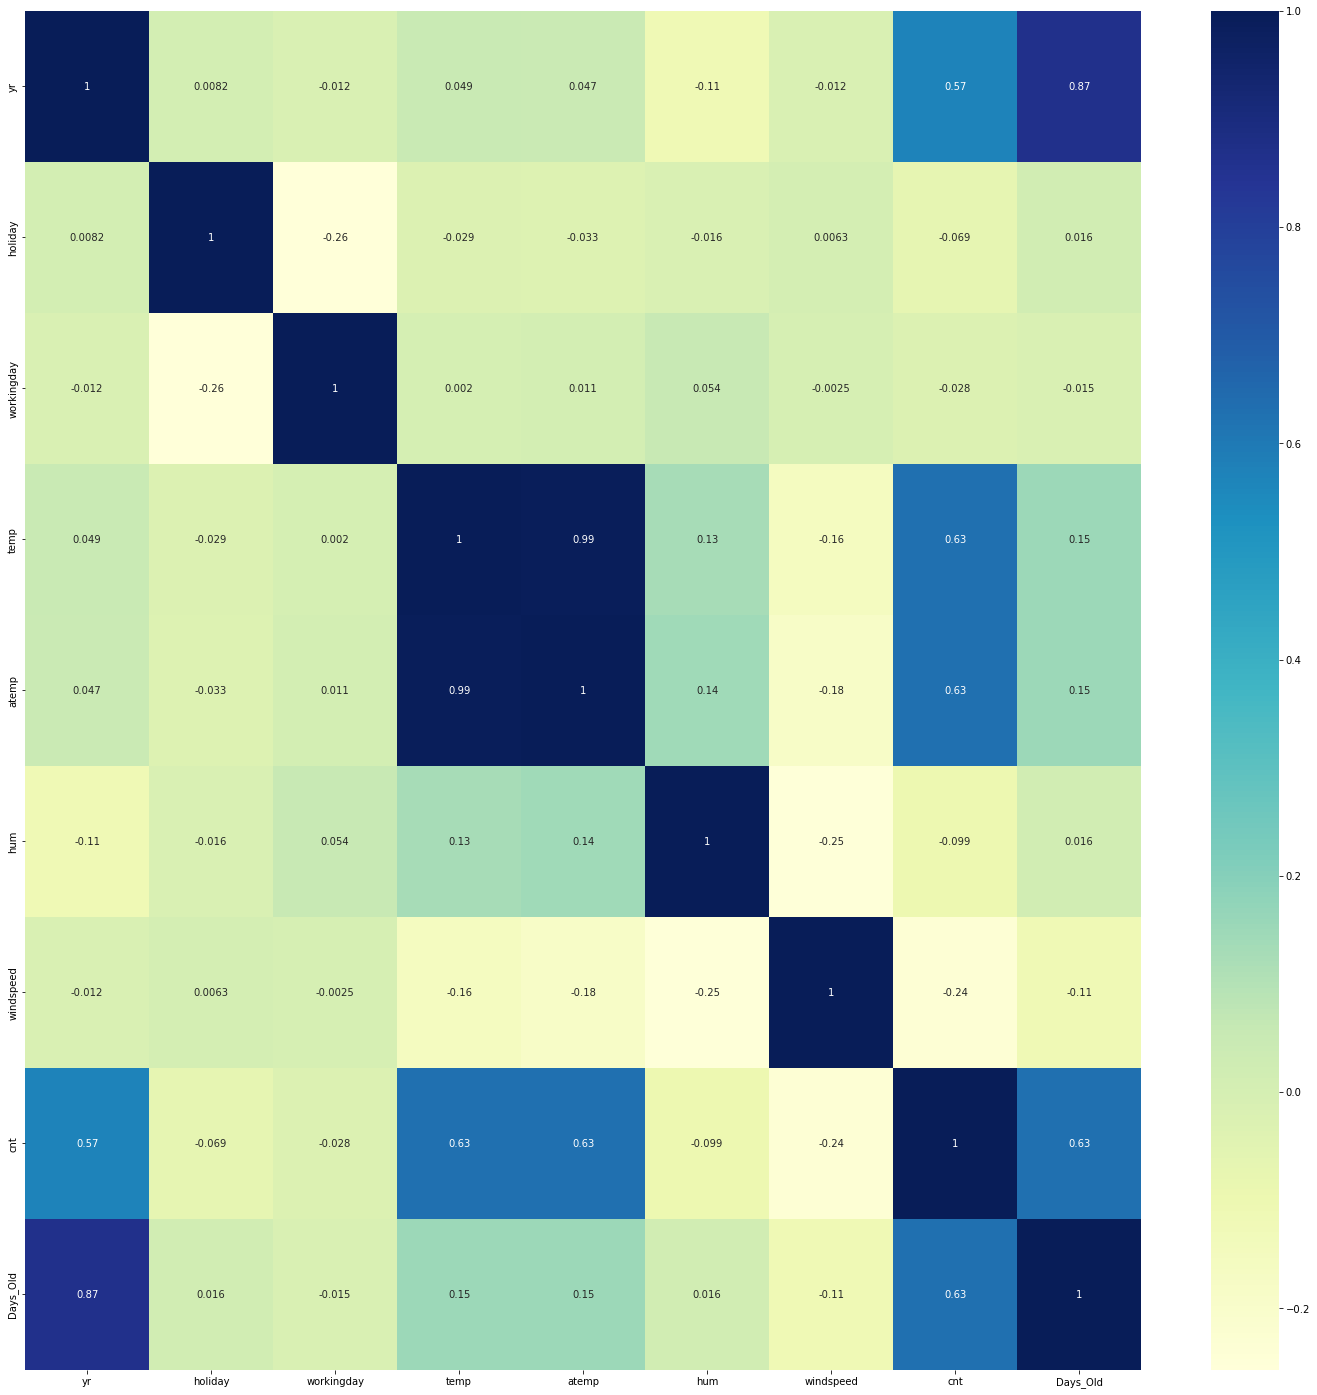

In [106]:
#Correlations for numeric variables
plt.figure(figsize=(25,25))
corr=BikeSharing_DF.corr()
sns.heatmap(corr, cmap="YlGnBu", annot = True)
plt.show()

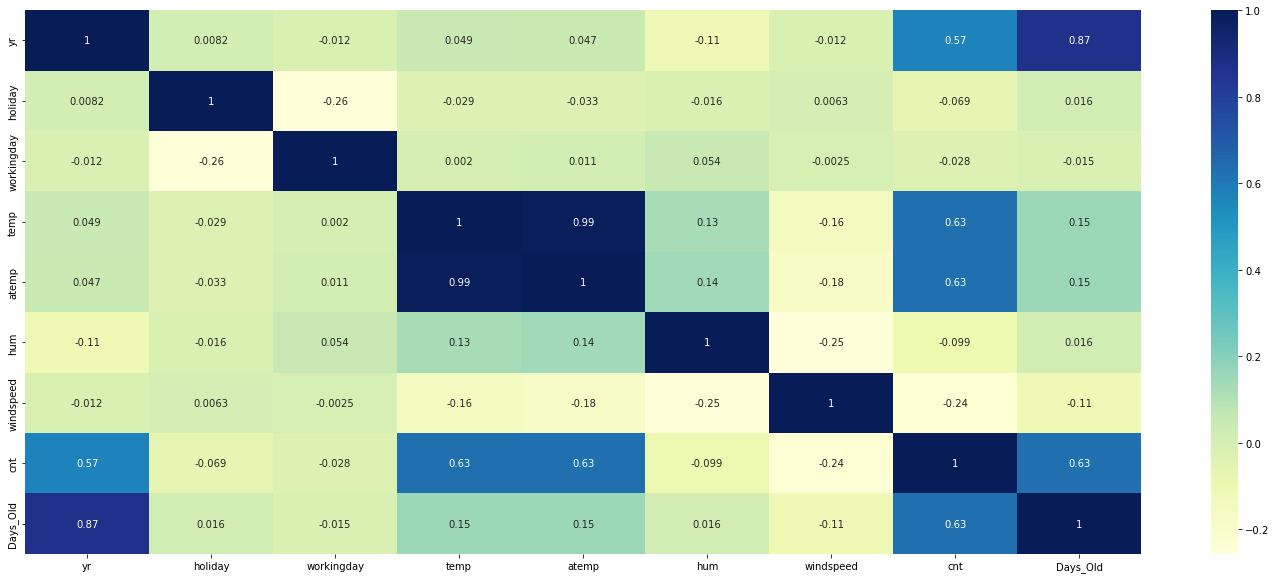

In [107]:
#Calculate Correlation
corr = BikeSharing_DF.corr()
plt.figure(figsize=(25,10))

#Draw Heatmap of correlation
sns.heatmap(corr,annot=True, cmap='YlGnBu' )
plt.show()

###### From the correlation of map, temp, atemp and days_old it seems it is highly correlated and can be considered for the model training

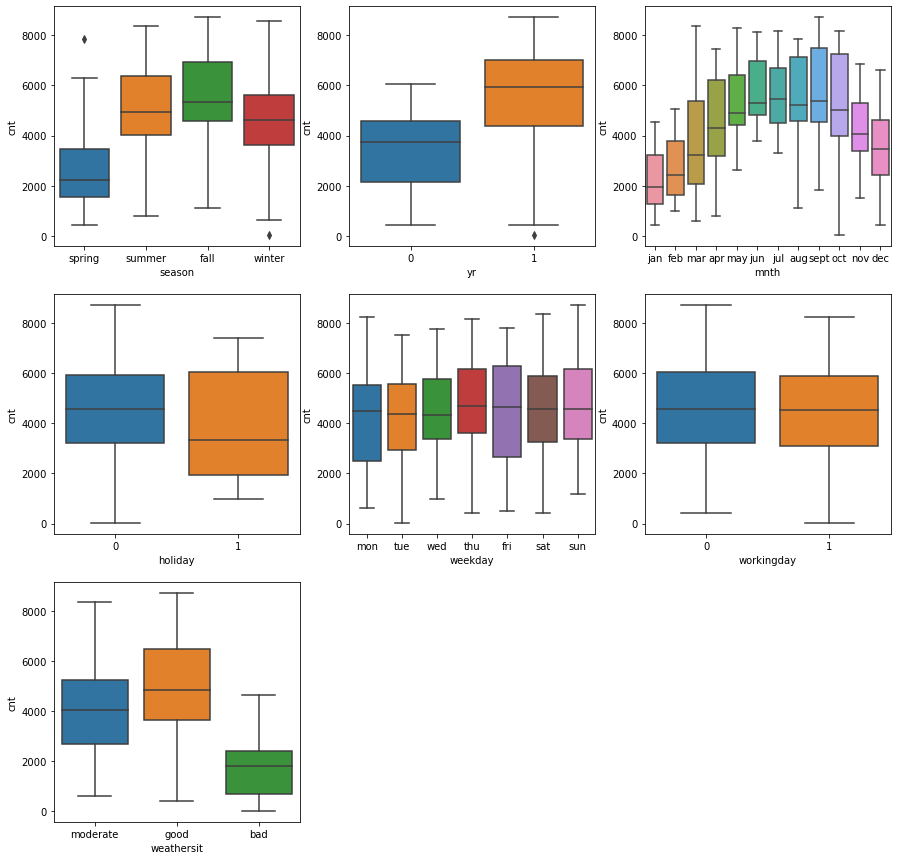

In [108]:
# Now we will draw Boxplot for categorical variables to see demands
vars_cat = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
plt.figure(figsize=(15, 15))
for i in enumerate(vars_cat):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(data=BikeSharing_DF, x=i[1], y='cnt')
plt.show()

# Observation

### From the above Graph
##### Interface:
1. Season3 (fall) has the highest demand for rental bikes
2. We can see that demand for next year has grown
3. Demand is continuously growing each month till June. September month has the highest demand. After September, demand is decreasing
4. When there is a holiday, demand has decreased.
5. The clear weathershit has the highest demand

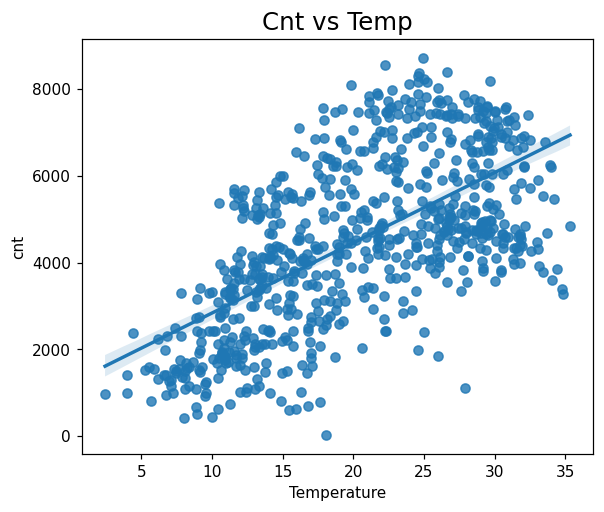

In [109]:
# Drawing Scatter Plot For Cnt and Hum, cnt and windspeed,and and temp  to check the slope

plt.figure(figsize=(6,5),dpi=110)
plt.title("Cnt vs Temp",fontsize=16)
sns.regplot(data=BikeSharing_DF,y="cnt",x="temp")
plt.xlabel("Temperature")
plt.show()

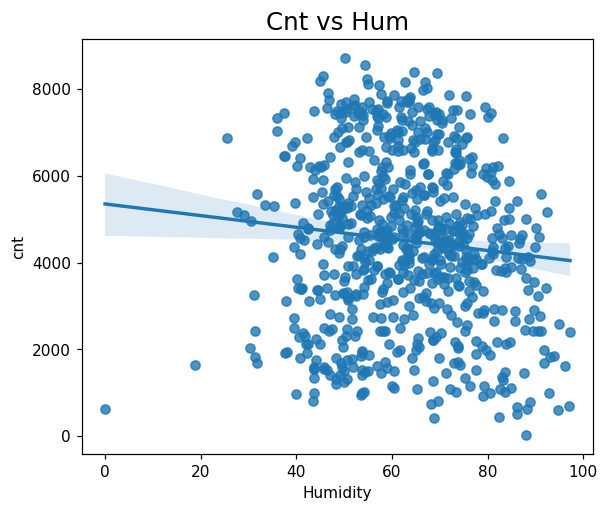

In [110]:
plt.figure(figsize=(6,5),dpi=110)
plt.title("Cnt vs Hum",fontsize=16)
sns.regplot(data=BikeSharing_DF,y="cnt",x="hum")
plt.xlabel("Humidity")
plt.show()

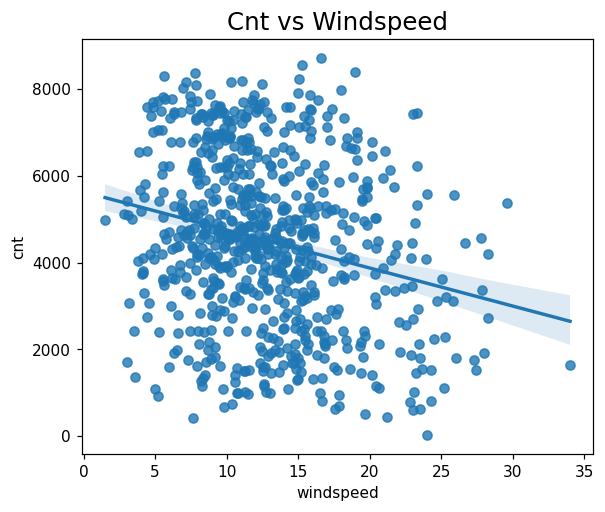

In [111]:
plt.figure(figsize=(6,5),dpi=110)
plt.title("Cnt vs Windspeed",fontsize=16)
sns.regplot(data=BikeSharing_DF,y="cnt",x="windspeed")
plt.show()

##### Inference from above graphs:
1. The windspeed value is more scattered.
2. We can see cnt decreasing for increased Humidity and Windspeed.
3. Demand is Positively Correlated with Temp i.e., cnt is increasing with Temp.

### Data Preparation For Model



Creating Dummy Variable

In [112]:
BikeSharing_DF = pd.get_dummies(data=BikeSharing_DF,columns=["season","mnth","weekday"],drop_first=True)
BikeSharing_DF = pd.get_dummies(data=BikeSharing_DF,columns=["weathersit"])

In [113]:
#Print the data frame info
BikeSharing_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   yr                   730 non-null    int64  
 1   holiday              730 non-null    int64  
 2   workingday           730 non-null    int64  
 3   temp                 730 non-null    float64
 4   atemp                730 non-null    float64
 5   hum                  730 non-null    float64
 6   windspeed            730 non-null    float64
 7   cnt                  730 non-null    int64  
 8   Days_Old             730 non-null    int64  
 9   season_spring        730 non-null    uint8  
 10  season_summer        730 non-null    uint8  
 11  season_winter        730 non-null    uint8  
 12  mnth_aug             730 non-null    uint8  
 13  mnth_dec             730 non-null    uint8  
 14  mnth_feb             730 non-null    uint8  
 15  mnth_jan             730 non-null    uin

## Model Building

Split the data in train and test

In [114]:
#Let's check the shape
BikeSharing_DF.head()

yr  holiday  workingday       temp     atemp      hum  windspeed   cnt  \
0   0        0           1  14.110847  18.18125  80.5833  10.749882   985   
1   0        0           1  14.902598  17.68695  69.6087  16.652113   801   
2   0        0           1   8.050924   9.47025  43.7273  16.636703  1349   
3   0        0           1   8.200000  10.60610  59.0435  10.739832  1562   
4   0        0           1   9.305237  11.46350  43.6957  12.522300  1600   

   Days_Old  season_spring  ...  mnth_sept  weekday_mon  weekday_sat  \
0         0              1  ...          0            1            0   
1         1              1  ...          0            0            0   
2         2              1  ...          0            0            0   
3         3              1  ...          0            0            0   
4         4              1  ...          0            0            0   

   weekday_sun  weekday_thu  weekday_tue  weekday_wed  weathersit_bad  \
0            0            0            0            0               0   
1            0            0            1            0               0   
2            0            0            0            1               0   
3            0            1            0            0               0   
4            0            0            0            0               0   

   weathersit_good  weathersit_moderate  
0                0                    1  
1                0                    1  
2                1                    0  
3                1                    0  
4                1                    0  

[5 rows x 32 columns]

In [115]:
BikeSharing_DF = BikeSharing_DF.reindex(columns=BikeSharing_DF.columns)

In [116]:
#y to contain only target variable
y=BikeSharing_DF.pop('cnt')

#X is all remainign variable also our independent variables
X=BikeSharing_DF

#Train Test split with 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [117]:
# Checking shape and size for train and test
print(X_train.shape)
print(X_test.shape)

(511, 31)
(219, 31)


Feature Scaling For Contineous Variable

In [118]:
# Importing required library
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

In [119]:
# Let us scale continuous variables
num_vars = ['temp','atemp','hum','windspeed']

#Use Normalized scaler to scale
scaler = MinMaxScaler()

#Fit and transform training set only
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

Use RFE To Delete Columns

In [120]:
# Build a Lienar Regression model using SKLearn for RFE
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [121]:
X_train.head()

yr  holiday  workingday      temp     atemp       hum  windspeed  \
683   1        0           1  0.327133  0.322150  0.639330   0.327101   
645   1        1           0  0.403972  0.404998  0.731215   0.419004   
163   0        0           1  0.717562  0.685963  0.509660   0.708724   
360   0        0           1  0.331287  0.326273  0.785745   0.415925   
640   1        0           1  0.745598  0.682653  0.817947   0.110593   

     Days_Old  season_spring  season_summer  ...  mnth_sept  weekday_mon  \
683       683              0              0  ...          0            0   
645       645              0              0  ...          0            0   
163       163              0              1  ...          0            0   
360       360              1              0  ...          0            0   
640       640              0              0  ...          0            0   

     weekday_sat  weekday_sun  weekday_thu  weekday_tue  weekday_wed  \
683            0            0            0            0            0   
645            0            0            0            1            0   
163            0            0            0            0            1   
360            0            0            1            0            0   
640            0            0            1            0            0   

     weathersit_bad  weathersit_good  weathersit_moderate  
683               0                0                    1  
645               0                0                    1  
163               0                1                    0  
360               0                0                    1  
640               0                0                    1  

[5 rows x 31 columns]

In [122]:
#Cut down the number of features to 15 using an automated approach
rfe= RFE(lr,n_features_to_select= 15)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [123]:
#Columns selected by RFE and their weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', False, 16),
 ('workingday', True, 1),
 ('temp', False, 2),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Days_Old', False, 17),
 ('season_spring', True, 1),
 ('season_summer', False, 10),
 ('season_winter', True, 1),
 ('mnth_aug', False, 14),
 ('mnth_dec', True, 1),
 ('mnth_feb', False, 11),
 ('mnth_jan', False, 13),
 ('mnth_jul', True, 1),
 ('mnth_jun', False, 12),
 ('mnth_mar', False, 3),
 ('mnth_may', False, 4),
 ('mnth_nov', True, 1),
 ('mnth_oct', False, 5),
 ('mnth_sept', True, 1),
 ('weekday_mon', False, 7),
 ('weekday_sat', True, 1),
 ('weekday_sun', True, 1),
 ('weekday_thu', False, 15),
 ('weekday_tue', False, 9),
 ('weekday_wed', False, 8),
 ('weathersit_bad', True, 1),
 ('weathersit_good', True, 1),
 ('weathersit_moderate', False, 6)]

In [124]:
#Function to build a model using stats model API - Takes the columns to be selected for the model as a parameter
def build_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

In [125]:
#Function to calculate VIFs and print them -Takes the columns for which VIF is to be calculated as a parameter
def get_vif(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [126]:
# Taking 15 columns supported by RFE for regression
X_train_rfe = X_train[['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']]

## Model 1

In [127]:
#Selected columns for Model 1 - all columns selected by RFE
cols = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     165.0
Date:                Wed, 21 Dec 2022   Prob (F-statistic):          1.70e-181
Time:                        14:18:36   Log-Likelihood:                -4134.9
No. Observations:                 511   AIC:                             8302.
Df Residuals:                     495   BIC:                             8370.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2809.2461    

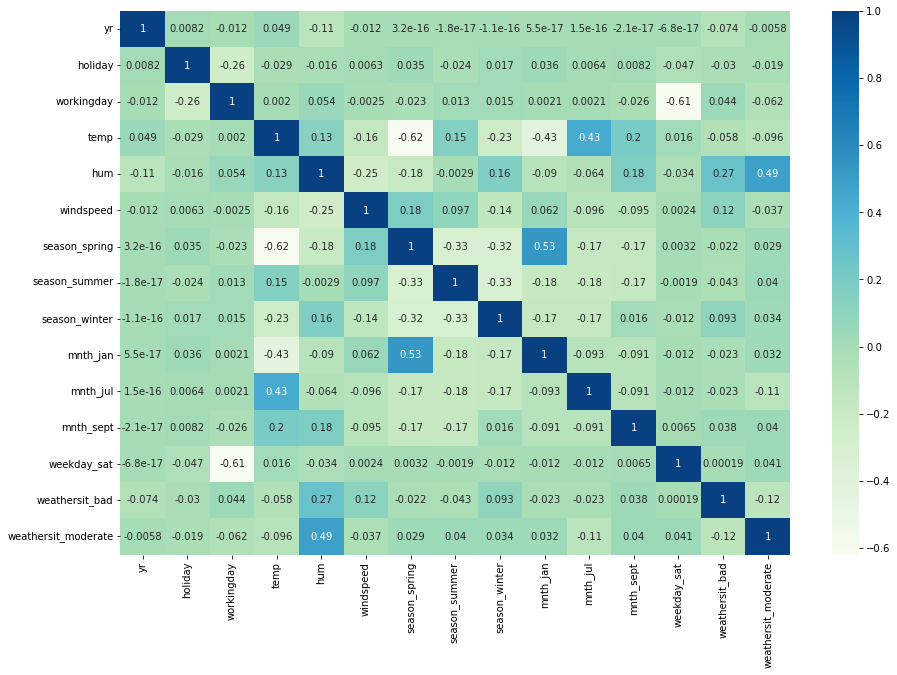

In [128]:
# Checking correlation of features selected by RFE with target column. 
# Also to check the impact of different features on the target.
plt.figure(figsize = (15,10))
sns.heatmap(BikeSharing_DF[['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']].corr(), cmap='GnBu', annot=True)
plt.show()

## Model 2

In [129]:
# Dropping the variable mnth_jan as it has a negative coefficient and is insignificant as it has a high p-value
cols = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     177.1
Date:                Wed, 21 Dec 2022   Prob (F-statistic):          1.35e-182
Time:                        14:18:38   Log-Likelihood:                -4135.0
No. Observations:                 511   AIC:                             8300.
Df Residuals:                     496   BIC:                             8363.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2792.2799    

## Model 3

In [130]:
# Dropping the variable hum as it has a negative coefficient and is insignificant as it has a high p-value
cols = ['yr', 'holiday', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     183.6
Date:                Wed, 21 Dec 2022   Prob (F-statistic):          3.37e-180
Time:                        14:18:38   Log-Likelihood:                -4143.4
No. Observations:                 511   AIC:                             8315.
Df Residuals:                     497   BIC:                             8374.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2004.0762    

## Model 4

In [131]:
# Dropping the variable holiday as it has a negative coefficient and is insignificant as it has a high p-value
cols = ['yr', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     193.1
Date:                Wed, 21 Dec 2022   Prob (F-statistic):          1.51e-178
Time:                        14:18:38   Log-Likelihood:                -4150.1
No. Observations:                 511   AIC:                             8326.
Df Residuals:                     498   BIC:                             8381.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1845.8415    

## Model 5

In [132]:
# Dropping the variable mnth_jul as it has a negative coefficient and is insignificant as it has a high p-value
cols = ['yr', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     209.0
Date:                Wed, 21 Dec 2022   Prob (F-statistic):          8.20e-179
Time:                        14:18:38   Log-Likelihood:                -4152.2
No. Observations:                 511   AIC:                             8328.
Df Residuals:                     499   BIC:                             8379.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1779.2943    

## Model 6

In [133]:
# Dropping the variable temp as it has a negative coefficient and is insignificant as it has a high p-value
cols = ['yr', 'workingday', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     156.8
Date:                Wed, 21 Dec 2022   Prob (F-statistic):          4.14e-147
Time:                        14:18:38   Log-Likelihood:                -4229.9
No. Observations:                 511   AIC:                             8482.
Df Residuals:                     500   BIC:                             8528.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                5070.0855    

## Model 7

In [134]:
## Trying to replace July with spring as both were highly correlated

cols = ['yr', 'workingday', 'windspeed', 'mnth_jul',
       'season_summer', 'season_winter', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.598
Model:                            OLS   Adj. R-squared:                  0.590
Method:                 Least Squares   F-statistic:                     74.53
Date:                Wed, 21 Dec 2022   Prob (F-statistic):           1.84e-92
Time:                        14:18:38   Log-Likelihood:                -4359.5
No. Observations:                 511   AIC:                             8741.
Df Residuals:                     500   BIC:                             8788.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3428.8800    

## Model 8

In [135]:
## Trying to replace July with spring as both were highly correlated

cols = ['yr', 'workingday', 'windspeed', 'mnth_jul',
       'season_summer', 'season_winter', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.598
Model:                            OLS   Adj. R-squared:                  0.590
Method:                 Least Squares   F-statistic:                     74.53
Date:                Wed, 21 Dec 2022   Prob (F-statistic):           1.84e-92
Time:                        14:18:38   Log-Likelihood:                -4359.5
No. Observations:                 511   AIC:                             8741.
Df Residuals:                     500   BIC:                             8788.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3428.8800    

## Model 9

In [136]:
# Removing windspeed with spring as windspeed was highly correlated with temp
cols = ['yr', 'workingday', 'season_spring', 'mnth_jul',
       'season_summer', 'season_winter', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     148.1
Date:                Wed, 21 Dec 2022   Prob (F-statistic):          1.75e-142
Time:                        14:18:38   Log-Likelihood:                -4240.9
No. Observations:                 511   AIC:                             8504.
Df Residuals:                     500   BIC:                             8550.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4618.6083    

## Model 10

In [137]:
# Using the weekend "Sunday" which was dropped during RFE instead of Saturday.

cols = ['yr', 'workingday', 'season_spring', 'mnth_jul',
       'season_summer', 'season_winter', 'mnth_sept', 'weekday_sun',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     147.6
Date:                Wed, 21 Dec 2022   Prob (F-statistic):          3.20e-142
Time:                        14:18:38   Log-Likelihood:                -4241.5
No. Observations:                 511   AIC:                             8505.
Df Residuals:                     500   BIC:                             8552.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4681.2816    

## Model 11

In [138]:
# adding temp and removed 'season_summer' and 'workingday'
cols = ['yr', 'season_spring', 'mnth_jul',
        'season_winter', 'mnth_sept', 'weekday_sun',
       'weathersit_bad', 'weathersit_moderate', 'temp']

#['yr', 'holiday','temp', 'spring','winter', 'July','September','Sunday','Light_Snow_Rain','Mist_Clody']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     246.5
Date:                Wed, 21 Dec 2022   Prob (F-statistic):          9.73e-178
Time:                        14:18:38   Log-Likelihood:                -4160.4
No. Observations:                 511   AIC:                             8341.
Df Residuals:                     501   BIC:                             8383.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1740.7372    

# Model Evalution

In [139]:
#Build a model with all column to select feature automatically 
def build_model_sk(X,y):
    lr1 = LinearRegression()
    lr1.fit(X,y)
    return lr1

In [140]:
#Let us build the finalmodel using sklearn
cols = ['yr', 'season_spring', 'mnth_jul',
        'season_winter', 'mnth_sept', 'weekday_sun',
       'weathersit_bad', 'weathersit_moderate', 'temp']

#Build a model with above columns
lr = build_model_sk(X_train[cols],y_train)
print(lr.intercept_,lr.coef_)

1740.7372440164304 [ 1994.67955569 -1167.70089558  -514.63181313   496.75430396
   465.92729708   190.37518346 -2256.10482681  -662.38986442
  3984.25555511]


### Residual Analysis

In [141]:
y_train_pred = lr.predict(X_train[cols])

In [142]:
#Plot a histogram of the error terms
def plot_res_dist(act, pred):
    sns.distplot(act-pred)
    plt.title('Error Terms')
    plt.xlabel('Errors')

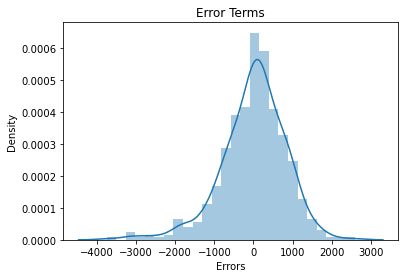

In [143]:
plot_res_dist(y_train, y_train_pred)

##### From the above chart, we can conclude that errors are normally distributed with a mean value of 0.
ALL GREEN!

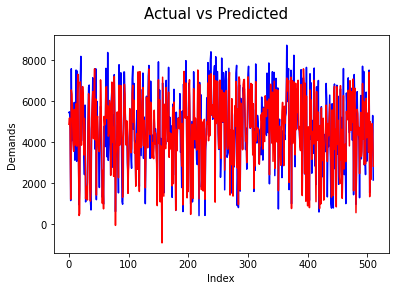

In [144]:
# Actual vs Predicted
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train, color="blue")
plt.plot(c,y_train_pred, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

Here, if we see the error terms are independent of each other 

In [145]:
#Print R-squared Value
r2_score(y_train,y_train_pred)

0.8158045196281632

### Linearity Check

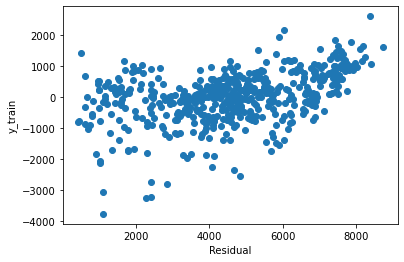

In [146]:
# scatter plot for the check
residual = (y_train - y_train_pred)
plt.scatter(y_train,residual)
plt.ylabel("y_train")
plt.xlabel("Residual")
plt.show()

### Predict Values From Test Data

In [147]:
#Scale variables in X_test
num_vars = ['temp','atemp','hum','windspeed']

#Test data to be transformed only, no fitting
X_test[num_vars] = scaler.transform(X_test[num_vars])

In [148]:
#Columns from our final model
cols = ['yr', 'season_spring', 'mnth_jul',
        'season_winter', 'mnth_sept', 'weekday_sun',
       'weathersit_bad', 'weathersit_moderate', 'temp']

#Predict the values for test data
y_test_pred = lr.predict(X_test[cols])

R Squared value for prediction

In [149]:
# Find out the R squared value between the test and predicted test data sets.  
r2_score(y_test,y_test_pred)

0.8127228702995222

# Conclusion

The company should focus on increasing business during Spring. The company should focus on increasing business during September. Based on previous data it is expected to have a boom in the number of users once the situation comes back to normal, compared to 2019. There would be fewer bookings during Light Snow or Rain, they could probably use this time to serve the bikes without having a business impact.